# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [111]:
import plotly.io as pio
pio.renderers.default = "png"
import kaleido
import keras.utils.np_utils
from ipython_genutils.py3compat import input
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential
from tqdm.keras import TqdmCallback
import pickle
from sklearn.preprocessing import LabelBinarizer

import keras
import ipyplot

import plotly.graph_objects as go
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D

from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3493120660685670387,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5717884928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13390442579734641477
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:02:00.0, compute capability: 8.6"]

In [112]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

y_train = keras.utils.np_utils.to_categorical(y_train, 100)
y_test = keras.utils.np_utils.to_categorical(y_test, 100)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 100)
(10000, 32, 32, 3)
(10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [98]:
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, BatchNormalization

from tensorflow.keras.optimizers import Adamax
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D

model_1 = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dense(100, activation='softmax')
])
model_1.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_88 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 4, 4, 512)       

Обучите созданную модель

In [99]:
model_1.compile(loss=['categorical_crossentropy'], optimizer=Adamax(0.01), metrics=["accuracy"])

history_1 = model_1.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=256, 
    verbose=0, 
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [100]:
model_2 = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='softmax')
])
model_2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_70 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_71 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_72 (Batc (None, 16, 16, 128)       512       
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 8, 8, 128)       

Обучите созданную модель

In [ ]:
model_2.compile(loss=['categorical_crossentropy'], optimizer=Adamax(0.01), metrics=["accuracy"])

history_2 = model_2.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=256, 
    verbose=0, 
    callbacks=[TqdmCallback(verbose=1)]
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, Dropout

model_3 = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(100, activation='softmax')
])
model_3.summary()

Обучите созданную модель

In [ ]:
model_3.compile(loss=['categorical_crossentropy'], optimizer=Adamax(0.01), metrics=["accuracy"])

history_3 = model_3.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=256, 
    verbose=0, 
    callbacks=[TqdmCallback(verbose=1)]
)

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [ ]:
model_4 = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.2),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(100, activation='softmax')
])
model_4.summary()

Обучите созданную модель

In [ ]:
model_4.compile(loss=['categorical_crossentropy'], optimizer=Adamax(0.01), metrics=["accuracy"])

history_4 = model_4.fit(
    x_train, 
    y_train, 
    validation_data=(x_test, y_test), 
    epochs=20, 
    batch_size=256, 
    verbose=0, 
    callbacks=[TqdmCallback(verbose=1)]
)

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

In [ ]:
def print_stats(history, epoches):
    fig = go.Figure()

    for key, _ in history.history.items():
        fig.add_trace(go.Scattergl(y=history.history[key],
                               name=key))

    fig.update_layout(height=500, width=700,
                  xaxis_title='Epoch',
                  yaxis_title='Loss')

    fig.update_xaxes(range=[0, epoches])
    fig.update_yaxes(range=[0, 4])

    fig.show()

#### Дефолтная модель

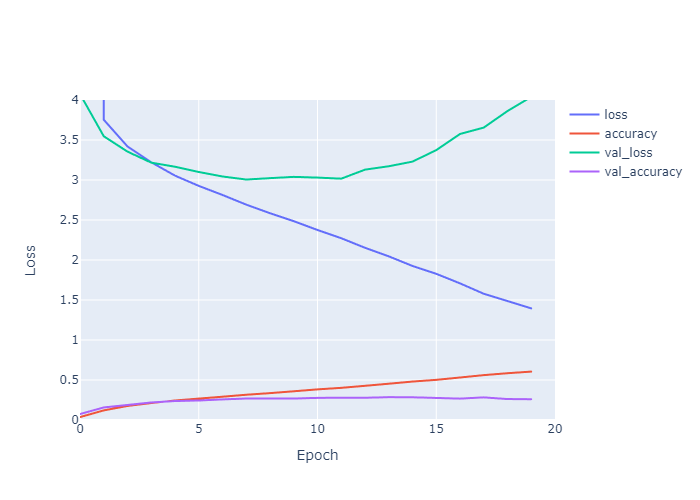

In [113]:
print_stats(history_1, 20)

#### BatchNormalization

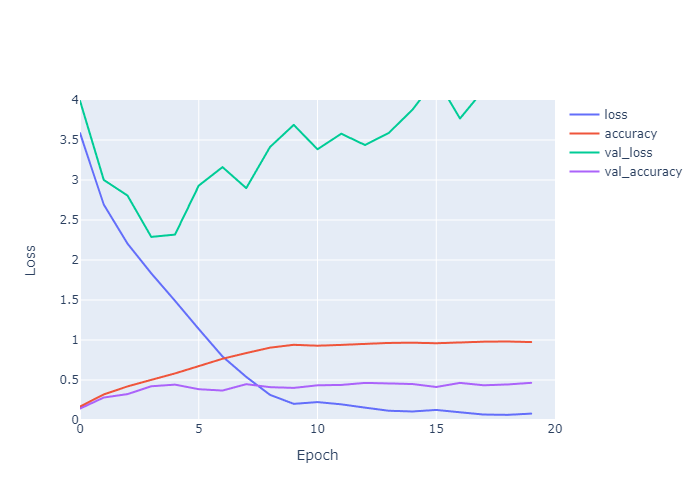

In [114]:
print_stats(history_2, 20)

#### Dropout

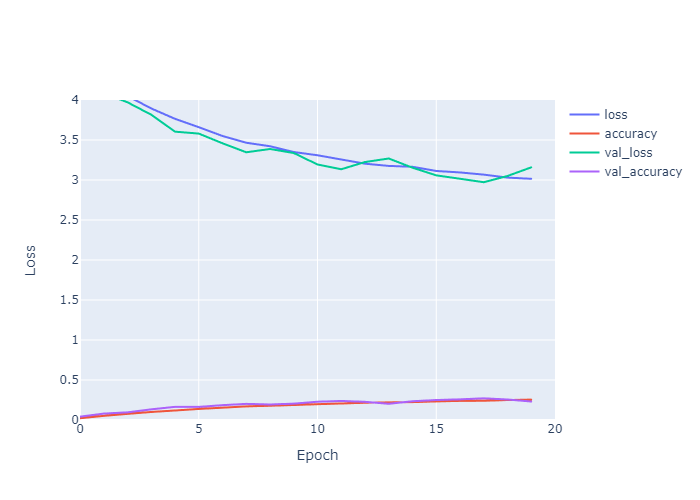

In [115]:
print_stats(history_3, 20)

#### BatchNormalization + Dropout

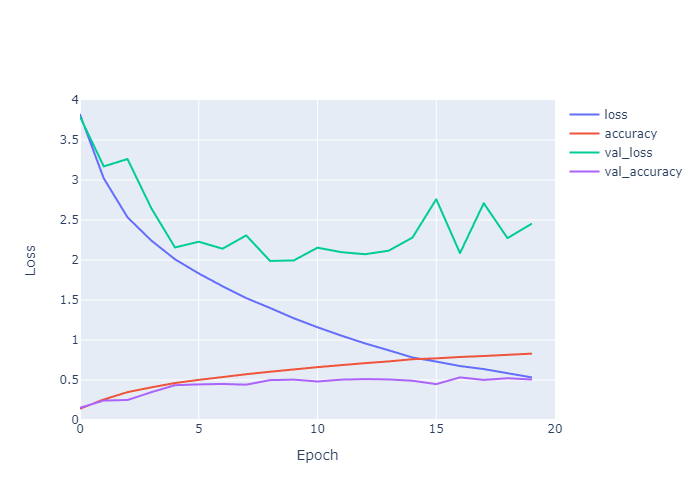

In [116]:
print_stats(history_4, 20)

Ваши выводы

Дефолтная модель начала переобучаться примерно к 5-й эпохе. К 20-й эпохе точность обучающей выборки достигла 60% при точности валидационной в 25%.

Модель с BatchNormalization уже на 3-й эпохе начала переобучаться. К 8-й эпохе точность обучающей выборки достигла значений около 100% при точности валидационной в ~50%.
BatchNormalization определенно ведет к увеличению скорости обучения нейронной сети при том же количестве эпох и данных.

В модели с Dropout к 20-й эпохе точность обучающей и валидационной выборки достигла ~25%, при этом не зафиксировано явных признаков переобучения. 
Dropout определенно предотвращает переобучение модели. Однако он снижает скорость обучения.

Модель с BatchNormalization и Dropout начала переобучаться на 5-й эпохе. К 20-й эпохе точность тренировочной выборки достигла значения в районе 85%, а точность валидационной выборки - ~50%.

Ваш итог

При проектировании архитектуры нейронных сетей определенно стоит использовать BatchNormalization и Dropout, т.к. в совокупности они позволяют добиться лучшей эффективности обучения нейронной сети при том же количестве данных и том же количестве эпох.